#Lasso y árboles de regresión

En este Notebook aplicaremos Lasso y árboles de regresión al mismo dataset que hemos estado trabajando: diabetes

In [1]:
# Importamos algunas librerías generales
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [3]:
# agregamos los nombres de variables para una mejor visualización de los datos. Esto no es estrictamente necesario.
df_x.columns = diabetes.feature_names
df_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


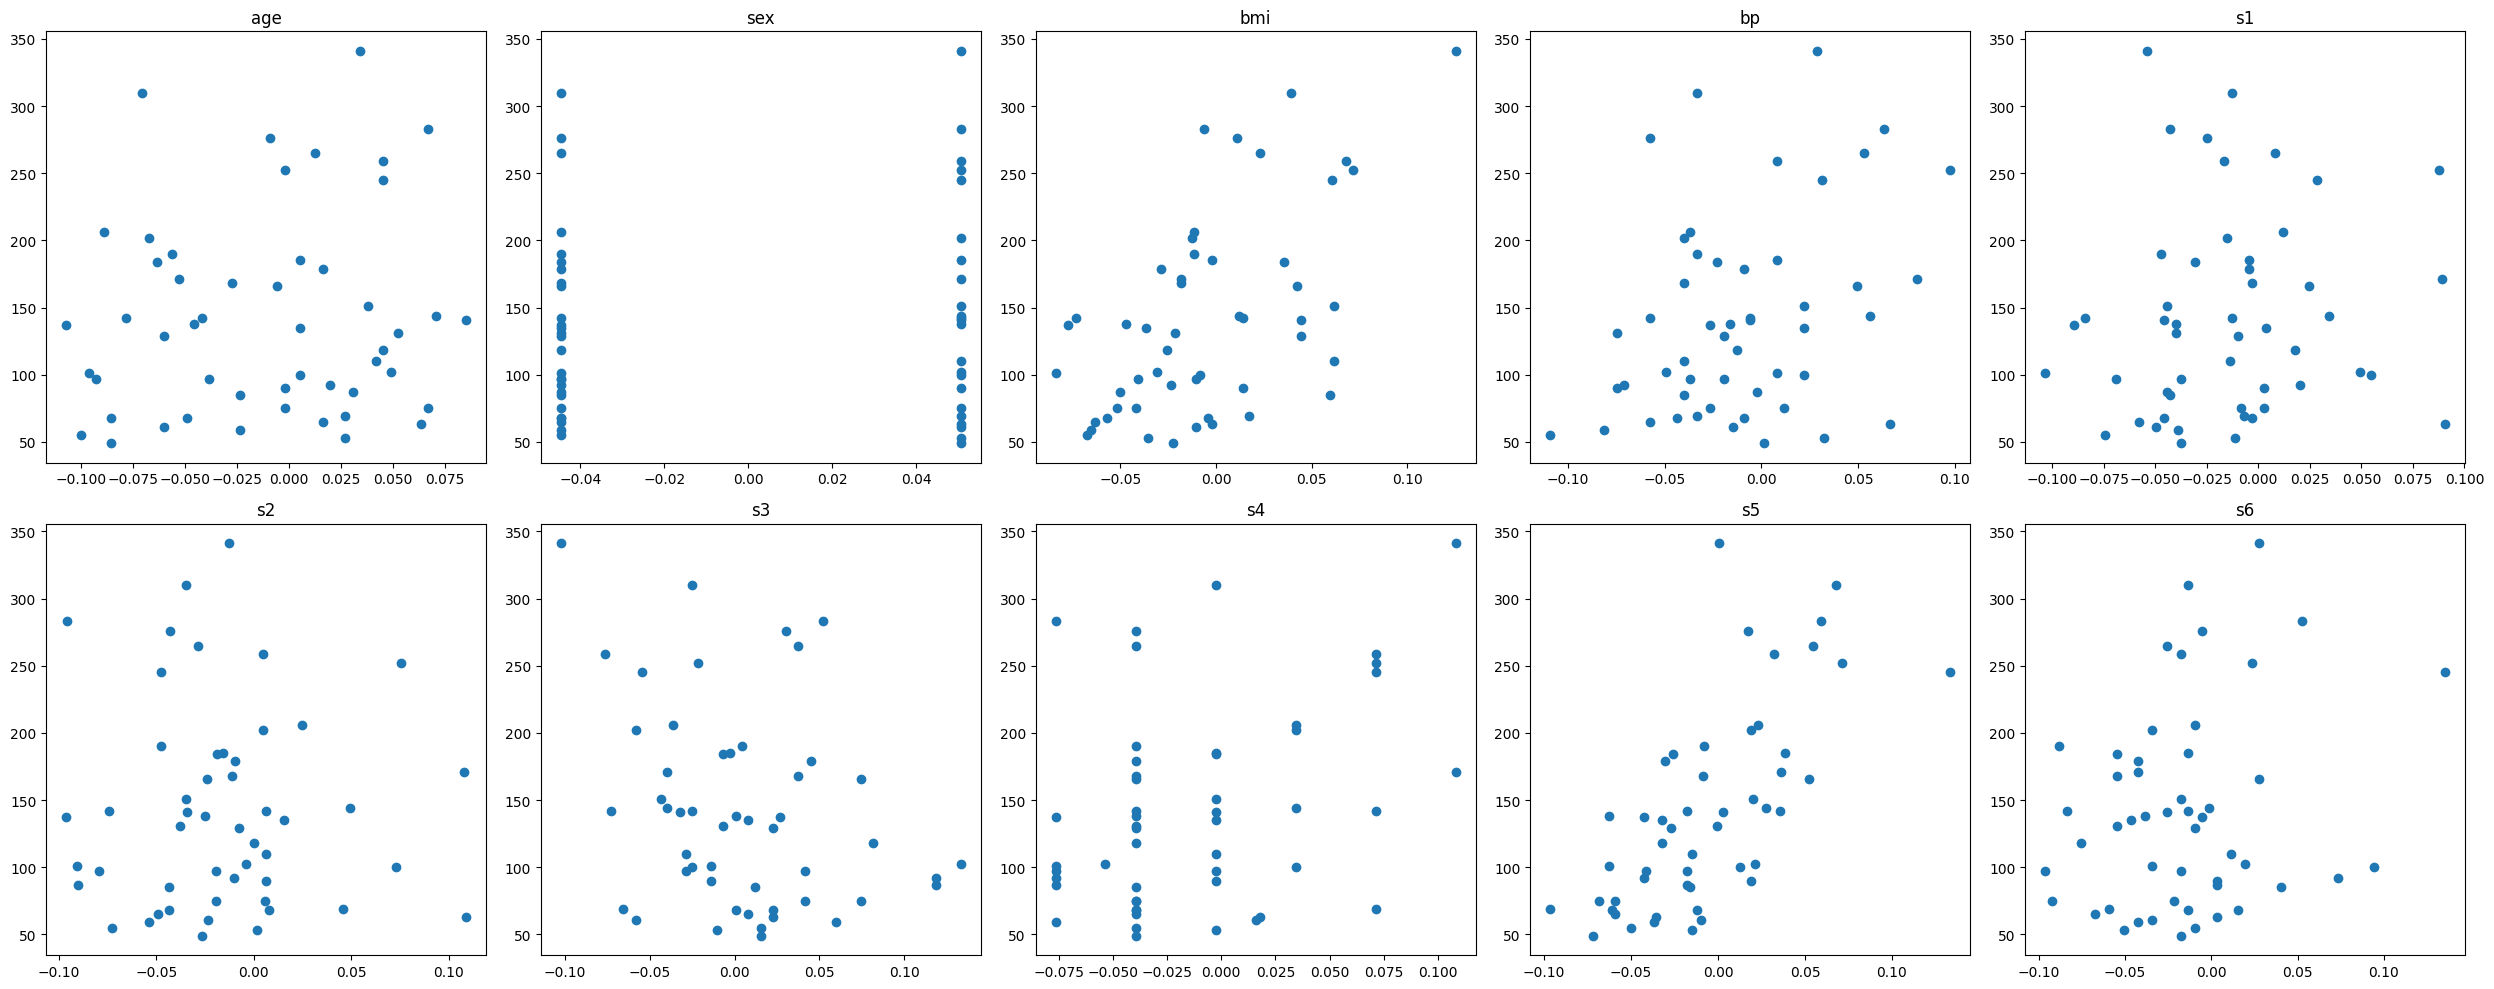

In [4]:
# Vemos la relación de cada variable con la variable Y
filas = 2
col = 5

nombres_col = diabetes.feature_names

# N es la cantidad de datos con los que trabajaremos. Se usa más adelante, atención!!
N = 50
fig, axs = plt.subplots(filas, col,figsize=(25,10))

n = 0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].set_title(nombres_col[n])
        axs[i,j].scatter(df_x[nombres_col[n]][:N],df_y[:N])
        n = n+1

fig.tight_layout()

#**Regresión Lasso**

[Revisar la función Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [5]:
# Debemos importar la misma libreria que la regresión lineal
from sklearn import linear_model

In [6]:
# Importamos la función para dividir entre training set y testing set
from sklearn.model_selection import train_test_split

# Usaremos todas las variables independientes.
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=771)

In [7]:
# Creamos el objeto de regresión lasso!!!!!
reg_lasso = linear_model.Lasso(alpha=0.1)

# Entrenamos el modelo con los datos de entrenamiento
reg_lasso.fit(X_train, Y_train)

# Hacemos predicciones!!!!
y_predicted = reg_lasso.predict(X_test) # hacemos predicciones de los datos de test

# ******************** ACA SE TERMINA LA REGRESION **************************************


# Los coeficientes
print('Coefficients: \n', 'Intercepto: ',reg_lasso.intercept_, '\nLos demas parametros betas:',reg_lasso.coef_)

# ******************** ACA SE CALCULAN LAS METRICAS **************************************
# El mean squared error!!!!
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_predicted))

# El mean absolute error!!!!
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, y_predicted))

# El R2!!!!
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_predicted))

Coefficients: 
 Intercepto:  [152.32662185] 
Los demas parametros betas: [  -0.         -143.53328473  531.9430643   249.86569734   -0.
   -0.         -263.63960832    0.          316.12793993  160.17417719]
Mean squared error: 2944.79
Mean absolute error: 44.31
Coefficient of determination: 0.46


Fijese en los valores de los coeficientes. Esta es una de las principales cualidades de este método. ¿Qué nos dice esos valores?

#Tarea:

modifique algunos hiper-parámetros del modelo. Busque mejorar el modelo.

#**Árbol de regresión**

[Revisar función de árbol de regresión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [8]:
# Debemos importar la libreria de árbol de regresión
from sklearn.tree import DecisionTreeRegressor

**Usaremos los mismos datos de training y testing set. Por lo que no es necesario aplicar la función train_test_split()**

In [9]:
# Creamos el objeto de regresión lasso!!!!!
reg_tree = DecisionTreeRegressor(max_depth=5)

# Entrenamos el modelo con los datos de entrenamiento
reg_tree.fit(X_train, Y_train)

# Hacemos predicciones!!!!
y_predicted = reg_tree.predict(X_test) # hacemos predicciones de los datos de test

# ******************** ACA SE TERMINA LA REGRESION **************************************


# ******************** ACA SE CALCULAN LAS METRICAS **************************************
# El mean squared error!!!!
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_predicted))

# El mean absolute error!!!!
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, y_predicted))

# El R2!!!!
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_predicted))

Mean squared error: 4438.96
Mean absolute error: 53.86
Coefficient of determination: 0.19


In [16]:
df_y.describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


Podemos tener una visualización del árbol

Profundidad del árbol: 5


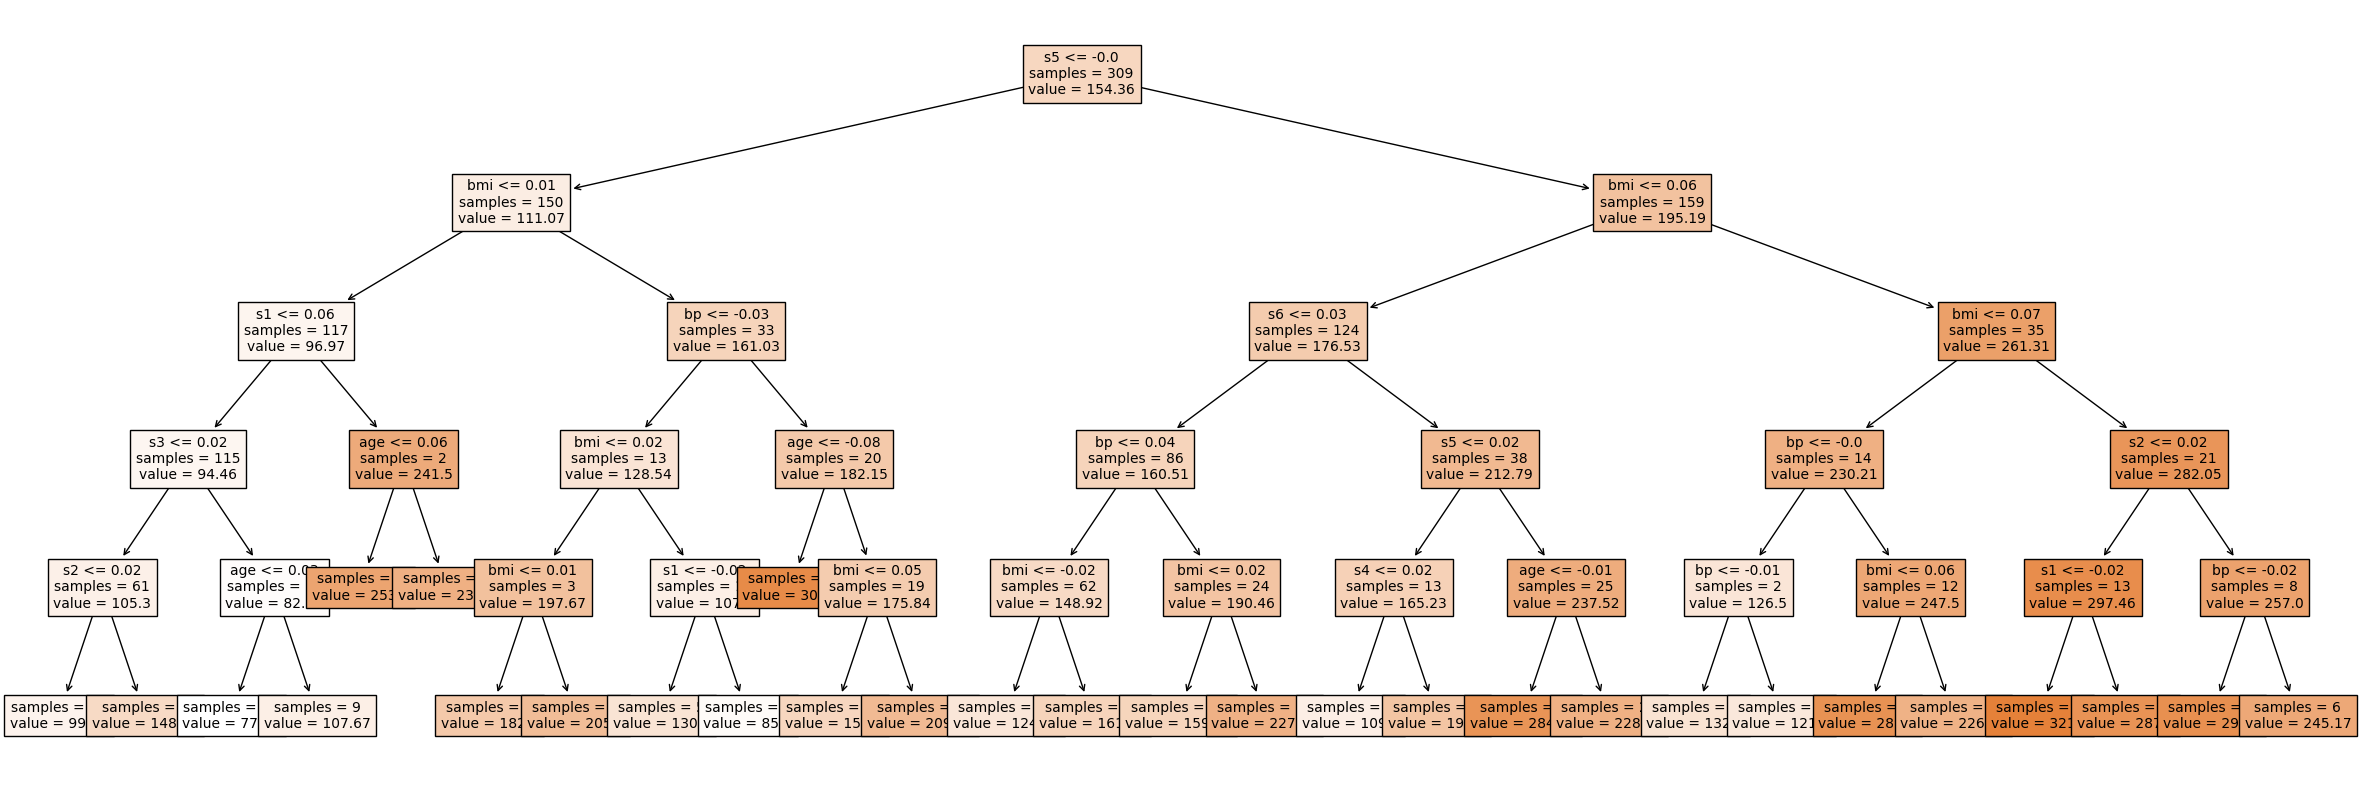

In [10]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30, 10))
print('Profundidad del árbol:', reg_tree.get_depth())

plot = plot_tree(decision_tree = reg_tree,
      feature_names = df_x.columns,
      filled = True,
      impurity = False,
      fontsize = 10,
      precision = 2,
      ax = ax)

Podemos visualizar la gráfica de los valores verdaderos del testing set con los valores de la predicción

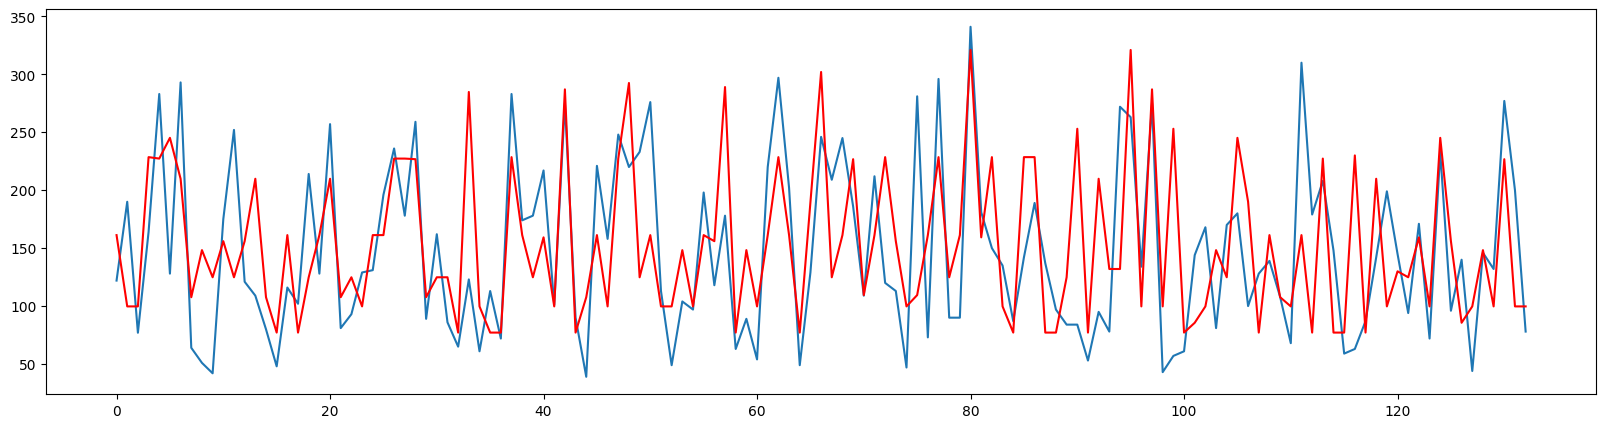

In [12]:
plt.subplots(figsize=(20,5))

plt.plot(np.array(Y_test).reshape(-1,1))
plt.plot(np.array(y_predicted).reshape(-1,1), 'r')

Pruebe con otros valores de hiper-parámetros y vea como cambia el árbol y la predicción

Pruebe ahora crear el modelo sin parámetros (es decir, sin entregarles inputs a la función DecisionTreeRegressor).

¿Nota algo extraño en las métricas de rendimiento?

.

.

.

.

.

.

.

.



.

.

.

.

.

.

.

.

.

.

**¿Algo con R2?**

##¿Qué significa un R2 negativo?

#**INVESTIGUE y presente su respuesta a su profesor**